In [75]:
import gravis as gv
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib import figure, text

In [60]:
#extract edges and nodes from the data/got_edges.csv file containing node1, node2, weight
def extract_edges_nodes_csv(file):
    edges = []
    nodes = []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            edges.append((line[0], line[1], float(line[2])))
            nodes.append(line[0])
            nodes.append(line[1])
    return edges, list(set(nodes))
    

In [61]:
got_edges, got_nodes = extract_edges_nodes_csv('data/got-edges.csv')

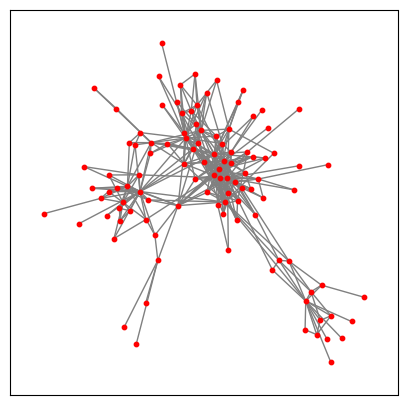

In [62]:
got_network = nx.Graph()
got_network.add_weighted_edges_from(got_edges)
#plot the graph
plt.figure(figsize=(5,5))
nx.draw_networkx(got_network, node_size=10, node_color='red', edge_color='grey', with_labels=False)

In [63]:
#basic graph info
print('Number of nodes: {}'.format(got_network.number_of_nodes()))
print('Number of edges: {}'.format(got_network.number_of_edges()))
print('Number of connected components: {}'.format(nx.number_connected_components(got_network)))
print('Average clustering coefficient: {}'.format(nx.average_clustering(got_network)))
print('Average shortest path length: {}'.format(nx.average_shortest_path_length(got_network) if nx.is_connected(got_network) else 'Not connected'))
print('Diameter: {}'.format(nx.diameter(got_network) if nx.is_connected(got_network) else 'Not connected'))
print('Density: {}'.format(nx.density(got_network)))
#edge attributes, so keys
edges = list(got_network.edges(data=True))
print('Edge attributes: {}'.format(edges[0]))


Number of nodes: 107
Number of edges: 352
Number of connected components: 1
Average clustering coefficient: 0.551443151559996
Average shortest path length: 2.903897019925939
Diameter: 6
Density: 0.062070181625815554
Edge attributes: ('Aemon', 'Grenn', {'weight': 5.0})


In [84]:
#determine communities
import community.community_louvain as louvain
partition = louvain.best_partition(got_network)
values = [partition.get(node) for node in got_network.nodes()]
#nodes takes color attribute

!pip install pygraphviz
#plot the graph with communities
plt.figure(figsize=(5,5))
pos = nx.nx_agraph.graphviz_layout(got_network)
nx.draw_networkx(got_network, cmap=plt.get_cmap('jet'), node_color=values, node_size=10, with_labels=False)

ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 500x500 with 0 Axes>

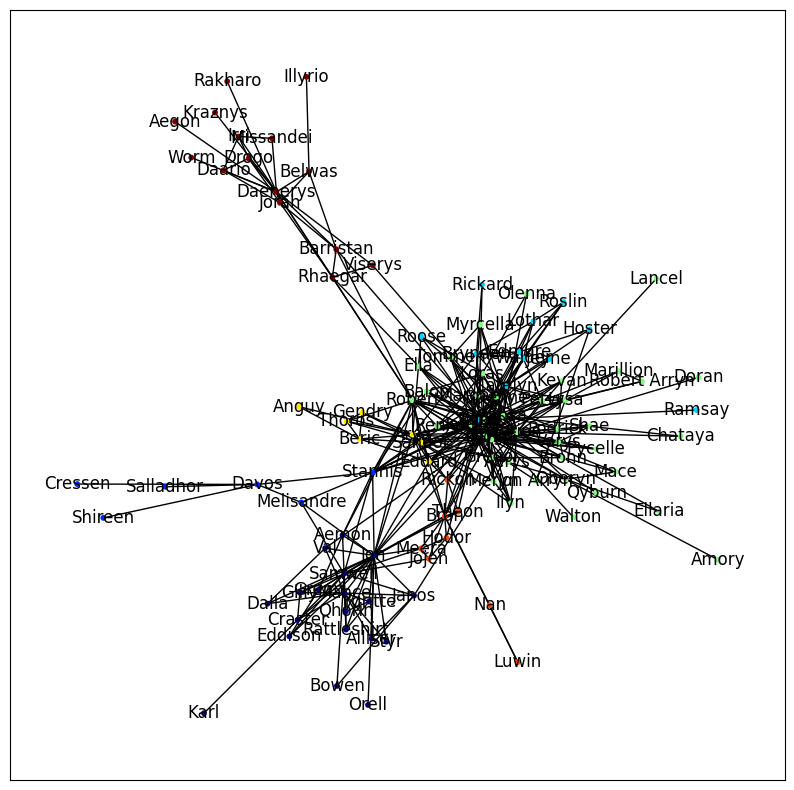

In [66]:
plt.figure(figsize=(10,10))
nx.draw_networkx(got_network, cmap=plt.get_cmap('jet'), node_color=values, node_size=10, with_labels=True)

In [81]:
#plot the graph with communities and labels, with the size of the nodes proportional to the degree and the width of the edges proportional to the weight
plt.figure(figsize=(10, 10))
degrees_dict = dict(got_network.degree)
edge_width = [(got_network[u][v]['weight']) / 20 for u, v in got_network.edges()]

# Number of communities
communities = len(set(partition.values()))
print('Number of communities: {}'.format(communities))

# Define community centers for each community
community_centers = [[0, 0], [0, 5], [5, 0], [5, 5], [2.5, 3.5], [3.5, 2.5], [1.5, 1.5], [4.5, 1.5]]

pos = {}
communities_dict = {}
for i in range(communities):
    communities_dict[i] = []

for node in got_network.nodes():
    communities_dict[partition[node]].append(node)

for i in range(communities):
    subgraph = got_network.subgraph(communities_dict[i])
    pos.update(nx.spring_layout(subgraph, center=community_centers[i], scale=2))

nx.draw(got_network, pos=pos, cmap=plt.get_cmap('jet'), node_size=[degrees_dict[k]*70 for k in degrees_dict], width=edge_width, with_labels=True, node_color=values)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=degrees_dict[node]*0.4, ha='center', va='center') 
plt.show()


Number of communities: 7


TypeError: graphviz_layout() got an unexpected keyword argument 'center'

<Figure size 1000x1000 with 0 Axes>